references:


*   Multivariate Time Series Forecasting with LSTMs in Keras (machinelearningmastery.com)
*   https://www.youtube.com/watch?v=4FmVIpcwl4k&t=1117s


*   BOOK: Hands-on time series analysis
*   List item





In [ ]:
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.compat.v1.set_random_seed(2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.constraints import maxnorm
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

mpl.rcParams['figure.figsize'] = (20, 20)
mpl.rcParams['axes.grid'] = False

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM

In [ ]:
df = pd.read_csv('/content/clean_daily_df_human_logic_supervised.csv')

In [ ]:
df.head()

,time,MIN_TEMPERATURE_C_t_7,clients_day_t_7,Holiday_Food_Related_t_7,consommation_t_7,pdl_total_daily_load_t_7,max_pdl_daily_load_t_7,weekend_t_7,MIN_TEMPERATURE_C_t_1,clients_day_t_1,Holiday_Food_Related_t_1,consommation_t_1,pdl_total_daily_load_t_1,max_pdl_daily_load_t_1,weekend_t_1,MIN_TEMPERATURE_C_t,clients_day_t,Holiday_Food_Related_t,consommation_t,pdl_total_daily_load_t,weekend_t,max_pdl_daily_load_t
0,08/01/2015,8,3970,1,7068.81,16580,1433.0,0,13,3972,0,7468.64,20928,1319.0,0,13,3972,0,7464.41,20809,0,1379.0
1,09/01/2015,12,3970,0,7074.65,22006,1439.0,0,13,3972,0,7464.41,20809,1379.0,0,13,3972,0,7464.41,20803,0,1370.0
2,10/01/2015,12,3970,1,7074.65,18629,1127.0,1,13,3972,0,7464.41,20803,1370.0,0,14,3972,0,7446.13,18059,1,1181.0
3,11/01/2015,15,3971,0,7075.31,18060,1099.0,1,14,3972,0,7446.13,18059,1181.0,1,16,3972,0,7058.37,17478,1,1093.0
4,12/01/2015,15,3971,0,7083.30,20122,1288.0,0,16,3972,0,7058.37,17478,1093.0,1,14,3979,0,7217.96,18556,0,1205.0


In [ ]:
df.tail()

,time,MIN_TEMPERATURE_C_t_7,clients_day_t_7,Holiday_Food_Related_t_7,consommation_t_7,pdl_total_daily_load_t_7,max_pdl_daily_load_t_7,weekend_t_7,MIN_TEMPERATURE_C_t_1,clients_day_t_1,Holiday_Food_Related_t_1,consommation_t_1,pdl_total_daily_load_t_1,max_pdl_daily_load_t_1,weekend_t_1,MIN_TEMPERATURE_C_t,clients_day_t,Holiday_Food_Related_t,consommation_t,pdl_total_daily_load_t,weekend_t,max_pdl_daily_load_t
2027,27/07/2020,24,5189,0,5719.4,12627,924.0,0,27,5189,0,5719.4,11167,781.0,1,28,5189,0,5719.4,13174,0,1010.0
2028,28/07/2020,25,5189,0,5719.4,12536,935.0,0,28,5189,0,5719.4,13174,1010.0,0,28,5189,0,5719.4,13097,0,986.0
2029,29/07/2020,25,5189,0,5719.4,13369,1023.0,0,28,5189,0,5719.4,13097,986.0,0,27,5189,0,5719.4,12000,0,873.0
2030,30/07/2020,26,5189,0,5719.4,13587,1027.0,0,27,5189,0,5719.4,12000,873.0,0,27,5189,0,5719.4,11604,0,762.0
2031,31/07/2020,27,5189,0,5719.4,13226,1017.0,0,27,5189,0,5719.4,11604,762.0,0,28,5189,1,5719.4,8935,0,528.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      2032 non-null   object 
 1   MIN_TEMPERATURE_C_t_7     2032 non-null   int64  
 2   clients_day_t_7           2032 non-null   int64  
 3   Holiday_Food_Related_t_7  2032 non-null   int64  
 4   consommation_t_7          2032 non-null   float64
 5   pdl_total_daily_load_t_7  2032 non-null   int64  
 6   max_pdl_daily_load_t_7    2032 non-null   float64
 7   weekend_t_7               2032 non-null   int64  
 8   MIN_TEMPERATURE_C_t_1     2032 non-null   int64  
 9   clients_day_t_1           2032 non-null   int64  
 10  Holiday_Food_Related_t_1  2032 non-null   int64  
 11  consommation_t_1          2032 non-null   float64
 12  pdl_total_daily_load_t_1  2032 non-null   int64  
 13  max_pdl_daily_load_t_1    2032 non-null   float64
 14  weekend_

In [ ]:
time = pd.to_datetime(df['time'], dayfirst=True).dropna()

In [ ]:
df.describe()

,MIN_TEMPERATURE_C_t_7,clients_day_t_7,Holiday_Food_Related_t_7,consommation_t_7,pdl_total_daily_load_t_7,max_pdl_daily_load_t_7,weekend_t_7,MIN_TEMPERATURE_C_t_1,clients_day_t_1,Holiday_Food_Related_t_1,consommation_t_1,pdl_total_daily_load_t_1,max_pdl_daily_load_t_1,weekend_t_1,MIN_TEMPERATURE_C_t,clients_day_t,Holiday_Food_Related_t,consommation_t,pdl_total_daily_load_t,weekend_t,max_pdl_daily_load_t
count,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000,2032.000000
mean,20.633366,4761.092028,0.113681,7498.069537,13720.760827,1082.264365,0.285433,20.678150,4764.689961,0.112697,7494.061850,13700.614665,1081.028637,0.285433,20.685531,4765.288878,0.113189,7493.201004,13694.712598,0.285433,1080.639365
std,5.917364,435.595628,0.317502,1189.333584,4953.021415,209.215731,0.451732,5.910439,434.079536,0.316300,1193.029654,4944.948179,209.136835,0.451732,5.910212,433.824788,0.316902,1193.678924,4943.474583,0.451732,209.429624
min,8.000000,3970.000000,0.000000,4664.350000,3197.000000,404.000000,0.000000,8.000000,3972.000000,0.000000,4664.350000,3197.000000,404.000000,0.000000,8.000000,3972.000000,0.000000,4664.350000,3197.000000,0.000000,404.000000
25%,16.000000,4355.000000,0.000000,6750.780000,10185.750000,936.750000,0.000000,16.000000,4356.000000,0.000000,6747.520000,10185.750000,935.000000,0.000000,16.000000,4356.000000,0.000000,6747.520000,10174.500000,0.000000,935.000000
50%,20.000000,4795.000000,0.000000,7383.670000,12869.000000,1073.000000,0.000000,20.000000,4799.000000,0.000000,7383.670000,12855.000000,1071.000000,0.000000,20.000000,4801.000000,0.000000,7381.705000,12855.000000,0.000000,1071.000000
75%,26.000000,5189.000000,0.000000,8125.475000,17240.500000,1243.717949,1.000000,26.000000,5189.000000,0.000000,8125.475000,17198.750000,1243.000000,1.000000,26.000000,5189.000000,0.000000,8125.475000,17174.000000,1.000000,1242.250000
max,34.000000,5354.000000,1.000000,10771.150000,27936.000000,1628.000000,1.000000,34.000000,5354.000000,1.000000,10771.150000,27936.000000,1628.000000,1.000000,34.000000,5354.000000,1.000000,10771.150000,27936.000000,1.000000,1628.000000


In [ ]:
df.columns

Index(['time', 'MIN_TEMPERATURE_C_t_7', 'clients_day_t_7',
       'Holiday_Food_Related_t_7', 'consommation_t_7',
       'pdl_total_daily_load_t_7', 'max_pdl_daily_load_t_7', 'weekend_t_7',
       'MIN_TEMPERATURE_C_t_1', 'clients_day_t_1', 'Holiday_Food_Related_t_1',
       'consommation_t_1', 'pdl_total_daily_load_t_1',
       'max_pdl_daily_load_t_1', 'weekend_t_1', 'MIN_TEMPERATURE_C_t',
       'clients_day_t', 'Holiday_Food_Related_t', 'consommation_t',
       'pdl_total_daily_load_t', 'weekend_t', 'max_pdl_daily_load_t'],
      dtype='object')

In [ ]:
df_input=df[['MIN_TEMPERATURE_C_t_7',
        'clients_day_t_7','Holiday_Food_Related_t_7', 'consommation_t_7',
       'pdl_total_daily_load_t_7', 'max_pdl_daily_load_t_7', 'weekend_t_7',

       'MIN_TEMPERATURE_C_t_1', 'clients_day_t_1', 'Holiday_Food_Related_t_1',
       'consommation_t_1', 'pdl_total_daily_load_t_1',
       'max_pdl_daily_load_t_1', 'weekend_t_1',
       
        'MIN_TEMPERATURE_C_t','clients_day_t', 'Holiday_Food_Related_t',
         'weekend_t', 'max_pdl_daily_load_t']].dropna()

the add of weekend feature makes the seasonal weekend decrease more visible, so increases performance

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df_input)

In [ ]:
data_scaled[-1]

array([0.73076923, 0.88078035, 0.        , 0.17276642, 0.4053923 ,
       0.50081699, 0.        , 0.73076923, 0.88060781, 0.        ,
       0.17276642, 0.3398278 , 0.29248366, 0.        , 0.76923077,
       0.88060781, 1.        , 0.        , 0.10130719])

In [ ]:
features=data_scaled[:,:-1]
target=data_scaled[:,-1]

In [ ]:
features.shape

(2032, 18)

In [ ]:
target.shape

(2032,)

In [ ]:
# split into train and test sets

n_train_days = -30*7

train_X,train_y = features[:n_train_days, :],target[:n_train_days]
test_X, test_y = features[n_train_days:, :],target[n_train_days:]

# reshape input to be 3D
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1],1))
test_X = test_X.reshape((test_X.shape[0],test_X.shape[1],1))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1822, 18, 1) (1822,) (210, 18, 1) (210,)


In [ ]:
def create_model(layers):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(LSTM(units=nodes,input_shape= (train_X.shape[1],1), kernel_constraint=maxnorm(3)))
            model.add(Dropout(0.3))
        else:
            model.add(LSTM(units=nodes, kernel_constraint=maxnorm(3)))
            model.add(Dropout(0.3))
    model.add(Dense(1)) 
    
    model.compile(loss='mse', optimizer='adam')
    return model

model = KerasClassifier(build_fn=create_model, verbose=0) #build_fn is the name of the 
#function to call to get your model.   
tscv = TimeSeriesSplit(n_splits=4)
layers = [[100], [100, 50], [100, 50, 25]]
batches=[16,32]
epochs=[100,200]
param_grid = dict(layers=layers, batch_size = batches , epochs=epochs)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_grid,scoring='r2')
grid_result=gsearch.fit(train_X, train_y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

Best: -9.754916 using {'batch_size': 16, 'epochs': 100, 'layers': [100]}


In [ ]:
model = Sequential()
model.add(LSTM(units=100,input_shape= (train_X.shape[1],1),kernel_constraint=maxnorm(3.5)))
model.add(Dropout(0.3))
model.add(Dense(units=1))

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20,mode='min',verbose=1)
mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, 
                     save_best_only=True)
model.compile(loss='mae', optimizer='adam')
history = model.fit(train_X, train_y, epochs=100, batch_size=16,validation_data=(test_X,test_y),
                    verbose=0,callbacks=[es,mc], shuffle=False)


Epoch 00001: val_loss improved from inf to 0.18890, saving model to best_model.h5

Epoch 00002: val_loss improved from 0.18890 to 0.16677, saving model to best_model.h5

Epoch 00003: val_loss did not improve from 0.16677

Epoch 00004: val_loss improved from 0.16677 to 0.15215, saving model to best_model.h5

Epoch 00005: val_loss did not improve from 0.15215

Epoch 00006: val_loss improved from 0.15215 to 0.13592, saving model to best_model.h5

Epoch 00007: val_loss did not improve from 0.13592

Epoch 00008: val_loss did not improve from 0.13592

Epoch 00009: val_loss did not improve from 0.13592

Epoch 00010: val_loss did not improve from 0.13592

Epoch 00011: val_loss improved from 0.13592 to 0.12972, saving model to best_model.h5

Epoch 00012: val_loss did not improve from 0.12972

Epoch 00013: val_loss improved from 0.12972 to 0.12720, saving model to best_model.h5

Epoch 00014: val_loss improved from 0.12720 to 0.10170, saving model to best_model.h5

Epoch 00015: val_loss did not 

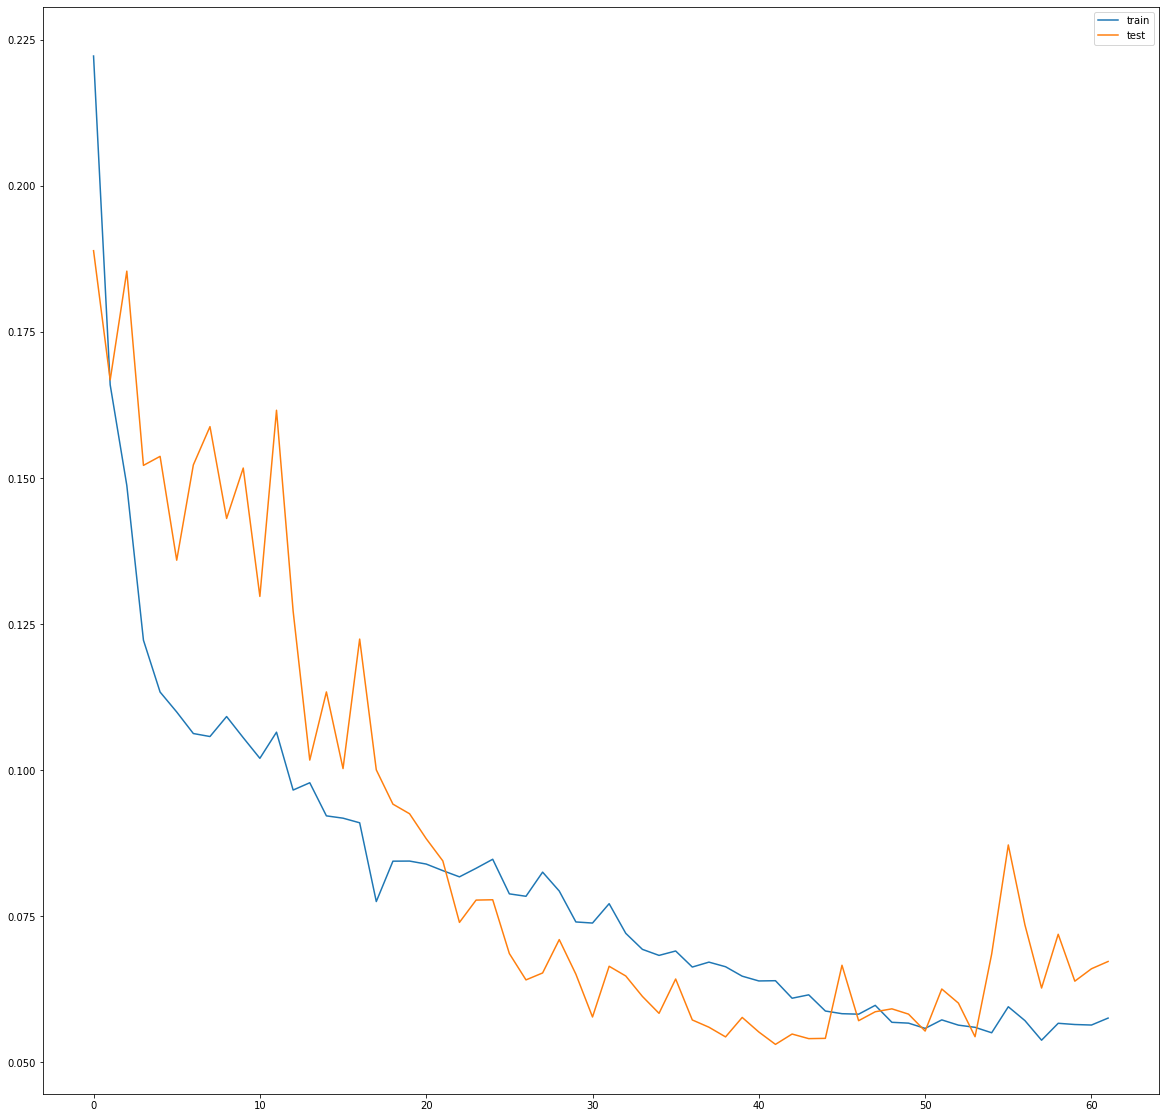

In [ ]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
  # load the saved model
model = load_model('best_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# make a prediction
yhat = model.predict(test_X) #shape=(14,1)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]))
# invert scaling for forecast
#inv_yhat = concatenate((test_X[:, :-1],yhat), axis=1)
inv_yhat = concatenate((test_X,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
#inv_y = concatenate((test_X[:, :-1],test_y), axis=1)
inv_y = concatenate((test_X,test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  def smape(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 2/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum((np.abs(y_true)+np.abs(y_pred)))*100
  def mase(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    naive_pred=y_true[1:]
    return 1/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true[:len(y_true)-1]-naive_pred))*(y_true.shape[0]-1)
  #def owe(y_true,y_pred):
   # return (mase(y_true,y_pred)+smape(y_true,y_pred))/2

  print('Evaluation metric results:-')
  print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
  print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)} %')
  #mape.append(mean_absolute_percentage_error(y_true, y_pred))
  #rmse.append(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
  print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
  print('SMAPE is : '+str(smape(y_true,y_pred))+'\n')
  print('MASE is : '+str(mase(y_true,y_pred)))
  return

In [ ]:
from sklearn import metrics
import numpy as np

timeseries_evaluation_metrics_func(inv_y, inv_yhat)

Evaluation metric results:-
MSE is : 10183.677457647149
MAE is : 64.92198991775516
RMSE is : 100.91420840321322
MAPE is : 5.997747444600328 %
R2 is : 0.7379070098752432

SMAPE is : 0.025940714884420325

MASE is : 0.7445100627056696


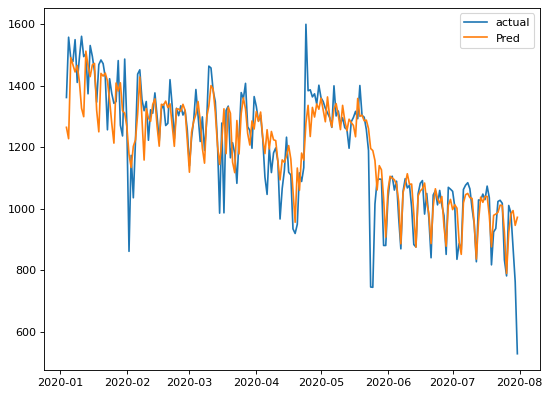

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[train_X.shape[0]:len(time)],inv_y,label='actual')
plt.plot(time[train_X.shape[0]:len(time)],inv_yhat,label='Pred')
plt.legend()
plt.show()

# peak period

In [ ]:
timeseries_evaluation_metrics_func(inv_y[:90], inv_yhat[:90])

Evaluation metric results:-
MSE is : 10611.318209070872
MAE is : 72.91998900837372
RMSE is : 103.01125282740169
MAPE is : 5.7271598219768745 %
R2 is : 0.3647643322889653

SMAPE is : 0.06157051319996055

MASE is : 0.7283814839220268


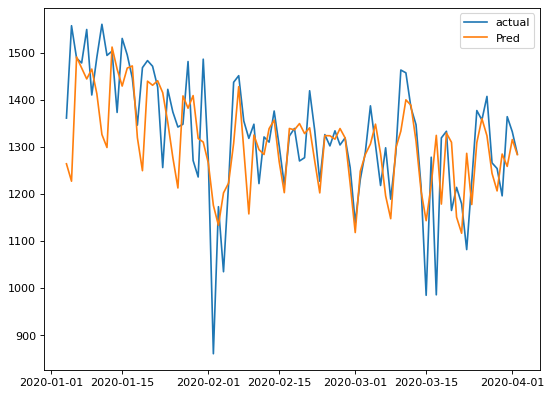

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[train_X.shape[0]:train_X.shape[0]+90],inv_y[:90],label='actual')
plt.plot(time[train_X.shape[0]:train_X.shape[0]+90],inv_yhat[:90],label='Pred')
plt.legend()
plt.show()